# Simple feed-forward neural network MNIST digits classification with Keras and Tensorflow

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keras (from TensorFlow) imports for the dataset and building NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [2]:
# load train/test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

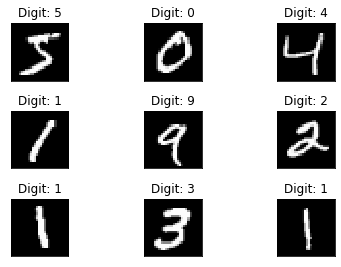

In [3]:
# Draw several figures
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

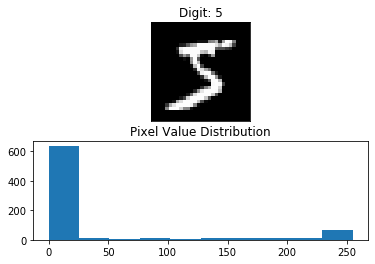

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [8]:
# print the final input shape ready for training
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
n_classes = 10
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2477 - accuracy: 0.9258 - val_loss: 0.1063 - val_accuracy: 0.9674
Epoch 2/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1010 - accuracy: 0.9689 - val_loss: 0.0773 - val_accuracy: 0.9751
Epoch 3/20
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0713 - accuracy: 0.9777 - val_loss: 0.0675 - val_accuracy: 0.9786
Epoch 4/20
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0540 - accuracy: 0.9826 - val_loss: 0.0672 - val_accuracy: 0.9793
Epoch 5/20
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.0670 - val_accuracy: 0.9803
Epoch 6/20
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0778 - val_accuracy: 0.9779
Epoch 7/20
60000/60000 [=======================

In [11]:
import os

save_dir = "results/"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# saving the model
model_name = 'keras_mnist_v1.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist_v1.h5 


In [12]:
# evaluate test data
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

10000/1 - 1s - loss: 0.0433 - accuracy: 0.9818


In [13]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# see which we predicted correctly and which not
predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

Test Loss 0.08654282410692644
Test Accuracy 0.9818
9818  classified correctly
182  classified incorrectly


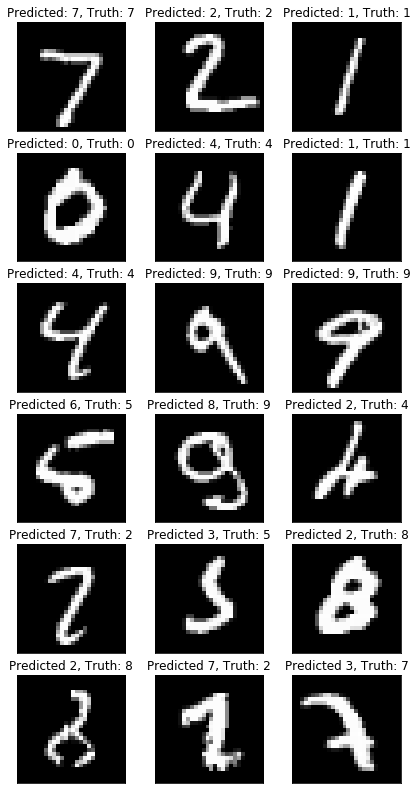

In [14]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])